**IMPORT NECESSARY LIBRARIES**

In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime

In [2]:
'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
'''Data Prep and Model Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error

In [5]:
'''Algos'''
import lightgbm as lgb

In [5]:
'''TensorFlow and Keras'''
import tensorflow as tf
from tensorflow import keras
K = keras.backend

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input, Lambda
from tensorflow.keras.layers import Embedding, Flatten, dot
from tensorflow.keras import regularizers
from tensorflow.keras.losses import mse, binary_crossentropy

**IMPORT THE DATASET**

In [6]:
current_path = os.getcwd()

In [7]:
with gzip.open("C:\\Users\\User\\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Deep Belief Networks\\mnist_data\mnist.pkl.gz", mode='rb') as file_content:
    train_set, validation_set, test_set = pickle.load(file=file_content, encoding='latin1')
    file_content.close()

In [8]:
'Train Set'
X_train, y_train = train_set[0], train_set[1]

'Validation Set'
X_validation, y_validation = validation_set[0], validation_set[1]

'Test Set'
X_test, y_test = test_set[0], test_set[1]

In [9]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


**CREATE A PANDAS DATAFRAME FROM THE SUB DATASETS**

In [10]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))

In [11]:
train_index

range(0, 50000)

In [12]:
validation_index

range(50000, 60000)

In [13]:
test_index

range(60000, 70000)

In [14]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
49995    5
49996    0
49997    8
49998    4
49999    8
Length: 50000, dtype: int64

In [17]:
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

In [18]:
X_validation

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_validation

50000    3
50001    8
50002    6
50003    9
50004    6
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 10000, dtype: int64

In [20]:
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [21]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
60000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Length: 10000, dtype: int64

In [23]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [24]:
y_train.head(5)

0    5
1    0
2    4
3    1
4    9
dtype: int64

**DISPLAY A DIGIT**

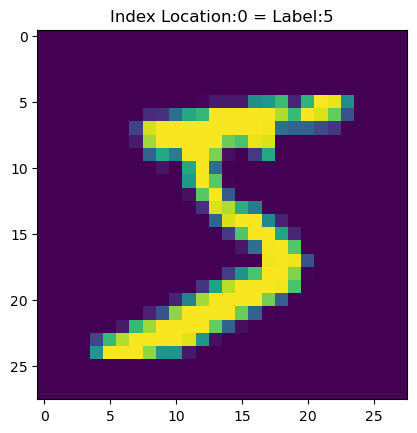

In [25]:
label = y_train.loc[0]
image = X_train.loc[0,:].values.reshape([28, 28])
plt.title(f'Index Location:{0} = Label:{label}')
plt.imshow(image, cmap=plt.get_cmap('viridis'))

In [26]:
def view_digit(X, y, index_location):
    label = y.loc[index_location]
    image = X.loc[index_location,:].values.reshape([28,28])
    plt.title(f'Index Location:{index_location} =  Label:{label}')
    plt.imshow(image, cmap=plt.get_cmap('viridis'))
    plt.show()

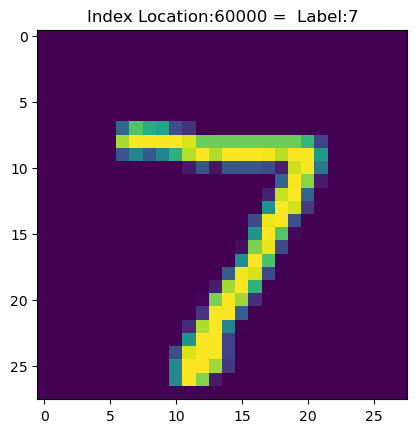

In [27]:
view_digit(X=X_test, y=y_test, index_location=60000)

**CREATE A ONE-HOT VECTOR FOR THE LABELS**

In [28]:
from sklearn import preprocessing as pp

In [29]:
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [30]:
def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [31]:
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

In [32]:
# Show one-hot vector for example 0, which is the number 5
y_train_oneHot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

**CREATE THE RESTRICTED BOLTZMANN MACHINE**

In [33]:
tf.compat.v1.disable_eager_execution()

In [34]:
class RBM(object):
    
    def __init__(self, input_size, output_size, 
                 learning_rate, epochs, batchsize):
        # Define hyperparameters
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        
        # Initialize weights and biases using zero matrices
        self.w = np.zeros([input_size, output_size], dtype=np.float32)
        self.hb = np.zeros([output_size], dtype=np.float32)
        self.vb = np.zeros([input_size], dtype=np.float32)

    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.compat.v1.random_uniform(tf.shape(probs))))

    def train(self, X):
        _w = tf.compat.v1.placeholder(tf.float32, [self._input_size, self._output_size])
        _hb = tf.compat.v1.placeholder(tf.float32, [self._output_size])
        _vb = tf.compat.v1.placeholder(tf.float32, [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        prv_hb = np.zeros([self._output_size], dtype=np.float32)
        prv_vb = np.zeros([self._input_size], dtype=np.float32)
        
        cur_w = np.zeros([self._input_size, self._output_size], dtype=np.float32)
        cur_hb = np.zeros([self._output_size], dtype=np.float32)
        cur_vb = np.zeros([self._input_size], dtype=np.float32)
        
        v0 = tf.compat.v1.placeholder(tf.float32, [None, self._input_size])
        h0 = self.sample_prob(self.prob_h_given_v(v0, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        
        positive_grad = tf.matmul(tf.transpose(v0), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        update_w = _w + self.learning_rate * (positive_grad - negative_grad) / tf.cast(tf.shape(v0)[0], tf.float32)
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(v0 - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        
        err = tf.reduce_mean(tf.square(v0 - v1))
        
        error_list = []
        
        with tf.compat.v1.Session() as sess:
            sess.run(tf.compat.v1.global_variables_initializer())
            
            for epoch in range(self.epochs):
                for start, end in zip(range(0, len(X), self.batchsize),range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch,  _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print ('Epoch: %d' % epoch,'reconstruction error: %f' % error)
                error_list.append(error)
                
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb
            return error_list

    def rbm_output(self, X):
        
        input_X = tf.constant(X)
        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)
        out = tf.nn.sigmoid(tf.matmul(input_X, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(input_X, _w, _hb))
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))
        with tf.compat.v1.Session() as sess:
            sess.run(tf.compat.v1.global_variables_initializer())
            return sess.run(out), sess.run(visibleGen), sess.run(hiddenGen)
        
    def show_features(self, shape, suptitle, count=-1):
        maxw = np.amax(self.w.T)
        minw = np.amin(self.w.T)
        count = self._output_size if count == -1 or count > self._output_size else count
        ncols = count if count < 14 else 14 
        nrows = count//ncols
        nrows = nrows if nrows > 2 else 3
        fig = plt.figure(figsize=(ncols, nrows), dpi=100)
        grid = grid(fig, rect=111, nrows_ncols=(nrows, ncols), axes_pad=0.01)

        for i, ax in enumerate(grid):
            x = self.w.T[i] if i<self._input_size else np.zeros(shape)
            x = (x.reshape(1, -1) - minw)/maxw
            ax.imshow(x.reshape(*shape), cmap=mpl.cm.Greys)
            ax.set_axis_off()

        fig.text(0.5,1, suptitle, fontsize=20, horizontalalignment='center')
        fig.tight_layout()
        plt.show()
        return

**Train the Three RBMs for the DBN**

In [42]:
# Since we are training, set input as training data
inputX = np.array(X_train)

In [43]:
# Create list to hold our RBMs
rbm_list = []

In [44]:
# Define the parameters of the RBMs we will train
rbm_list.append(RBM(784,700,1.0,100,200))
rbm_list.append(RBM(700,600,1.0,100,200))
rbm_list.append(RBM(600,500,1.0,100,200))

In [45]:
rbm_list

In [46]:
outputList = []
error_list = []

In [47]:
# for each RBM in our list
for i in range(0, len(rbm_list)):
    print('RBM', i+1)

    #Train a new one
    rbm = rbm_list[i]
    err = rbm.train(inputX)
    error_list.append(err)
    #Return the output layer
    outputX, reconstructedX, hiddenX = rbm.rbm_output(inputX)
    outputList.append(outputX)
    inputX = hiddenX

RBM 1
Epoch: 0 reconstruction error: 0.074285
Epoch: 1 reconstruction error: 0.064373
Epoch: 2 reconstruction error: 0.058826
Epoch: 3 reconstruction error: 0.055513
Epoch: 4 reconstruction error: 0.052943
Epoch: 5 reconstruction error: 0.050704
Epoch: 6 reconstruction error: 0.049127
Epoch: 7 reconstruction error: 0.047582
Epoch: 8 reconstruction error: 0.046852
Epoch: 9 reconstruction error: 0.046853
Epoch: 10 reconstruction error: 0.045625
Epoch: 11 reconstruction error: 0.045284
Epoch: 12 reconstruction error: 0.044661
Epoch: 13 reconstruction error: 0.044342
Epoch: 14 reconstruction error: 0.043910
Epoch: 15 reconstruction error: 0.043177
Epoch: 16 reconstruction error: 0.043257
Epoch: 17 reconstruction error: 0.042650
Epoch: 18 reconstruction error: 0.043013
Epoch: 19 reconstruction error: 0.042516
Epoch: 20 reconstruction error: 0.042500
Epoch: 21 reconstruction error: 0.041906
Epoch: 22 reconstruction error: 0.041981
Epoch: 23 reconstruction error: 0.041729
Epoch: 24 reconstruc

RBM 1


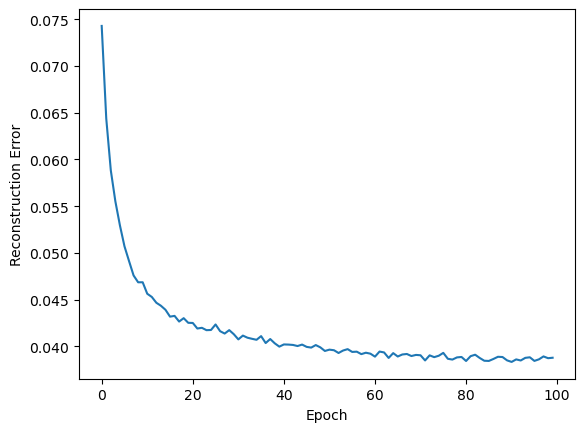

RBM 2


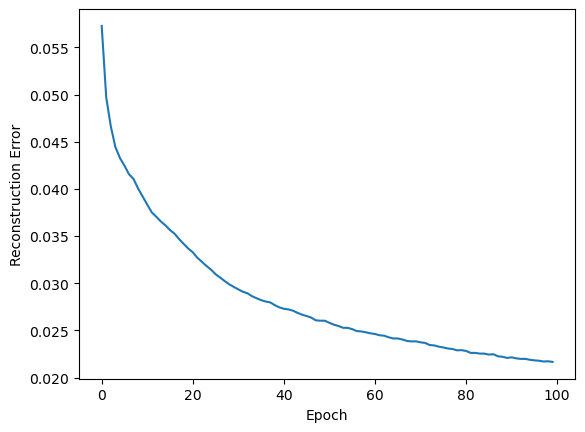

RBM 3


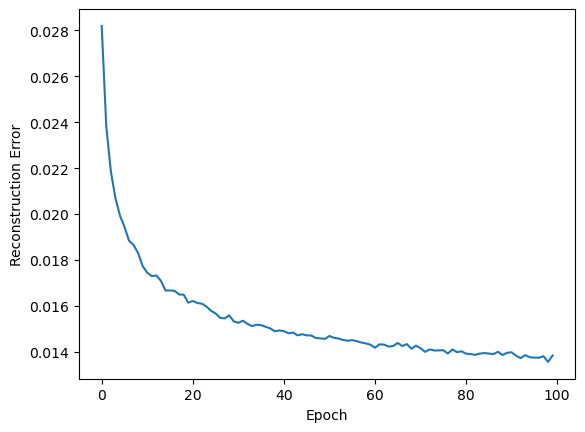

In [51]:
# Plot reconstruction errors
i = 1
for err in error_list:
    print("RBM",i)
    pd.Series(err).plot(logy=False)
    plt.xlabel("Epoch")
    plt.ylabel("Reconstruction Error")
    plt.show()
    i += 1

**Examine Feature Detectors**

In [62]:
# Examine Feature Detectors
rbm_shapes = [(28,28),(35,20),(30,20)]
for i in range(0,len(rbm_list)):
    rbm = rbm_list[i]
    print("RBM",i)
    print(rbm.show_features(rbm_shapes[i], "RBM learned features from MNIST", 56))

RBM 0


NameError: name 'Grid' is not defined

<Figure size 1400x400 with 0 Axes>

**View Generated Images**

RBM 1
Image generated by RBM


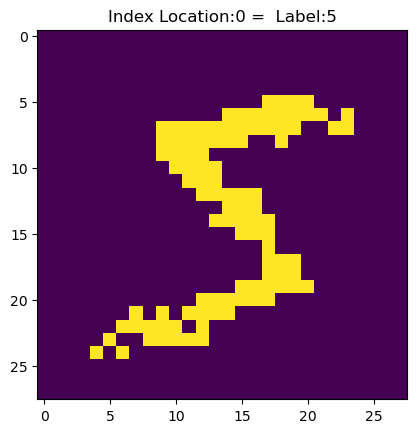

Original image


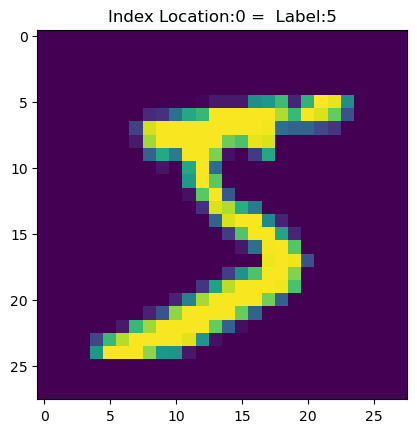

Image generated by RBM


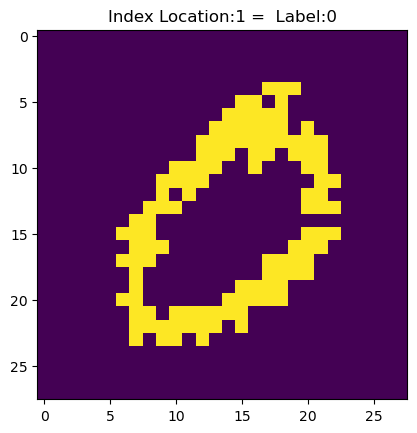

Original image


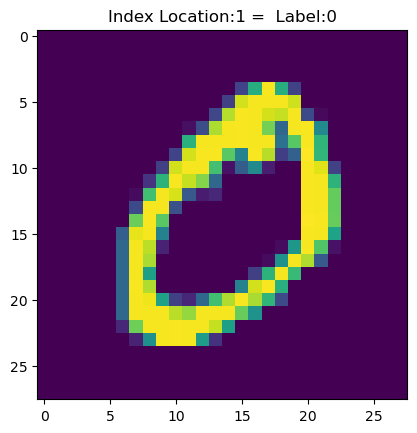

Image generated by RBM


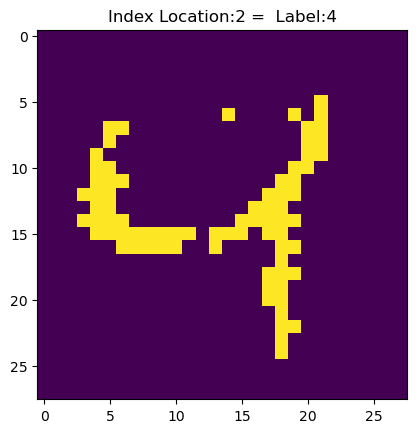

Original image


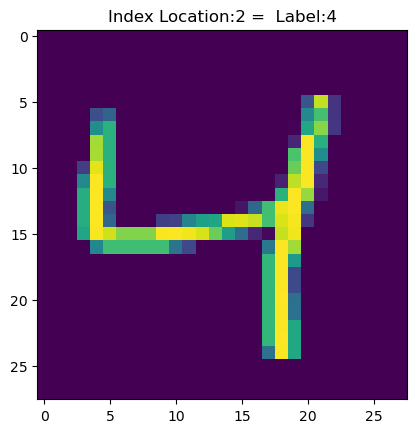

Image generated by RBM


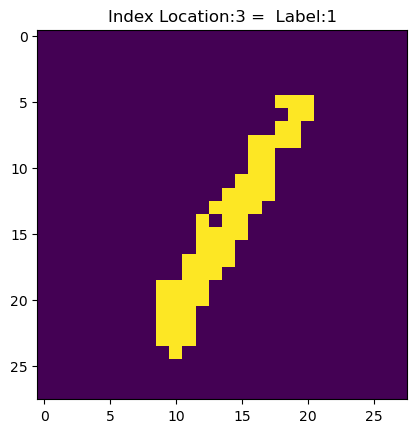

Original image


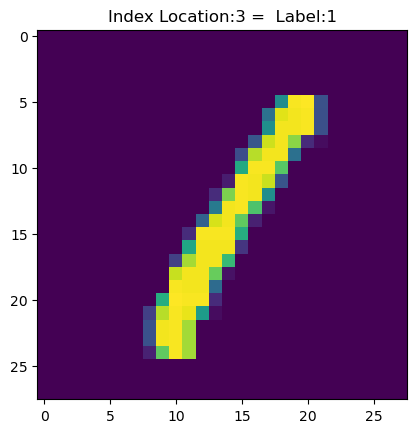

Image generated by RBM


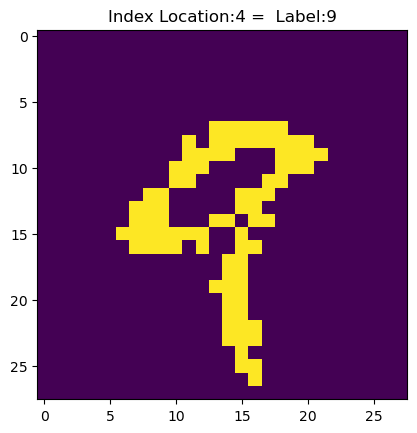

Original image


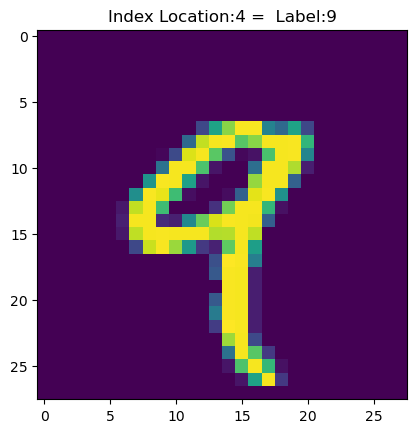

Image generated by RBM


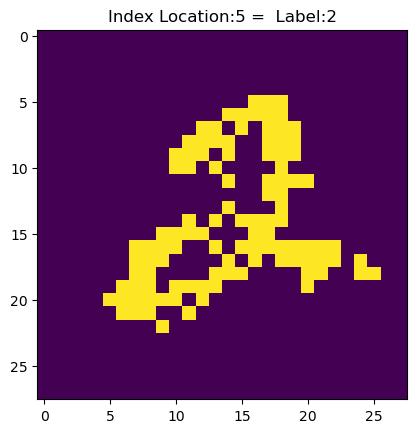

Original image


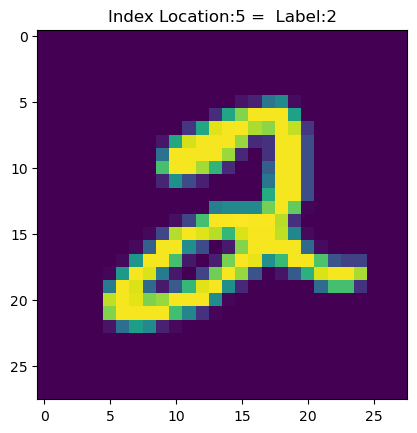

Image generated by RBM


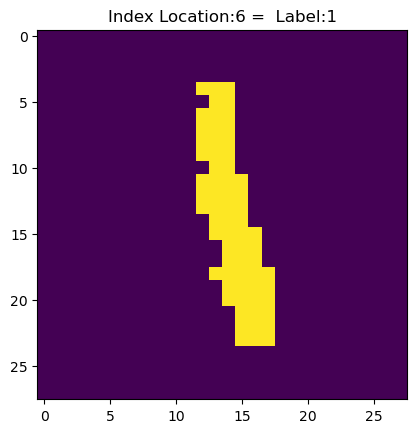

Original image


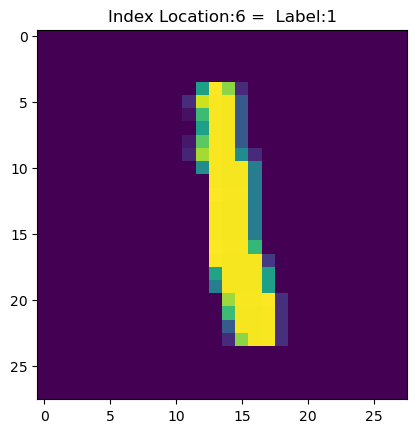

Image generated by RBM


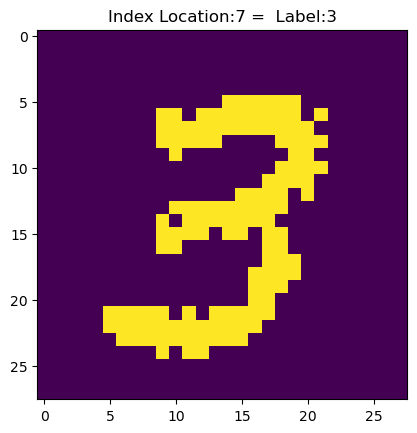

Original image


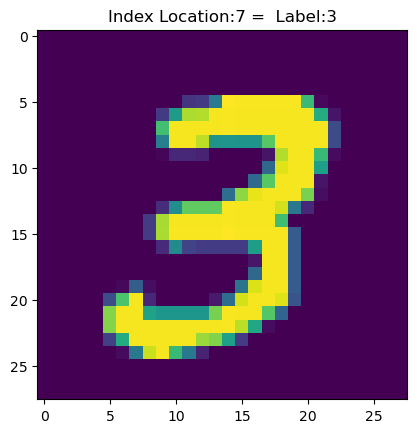

Image generated by RBM


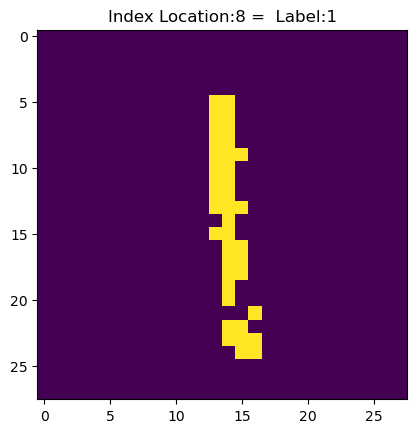

Original image


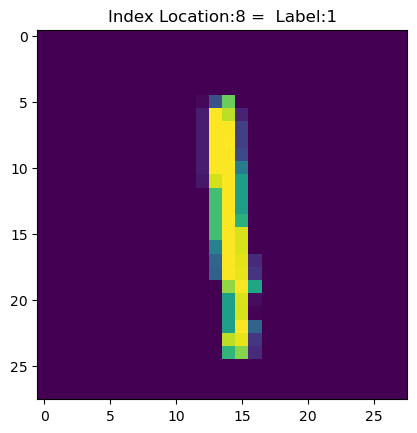

Image generated by RBM


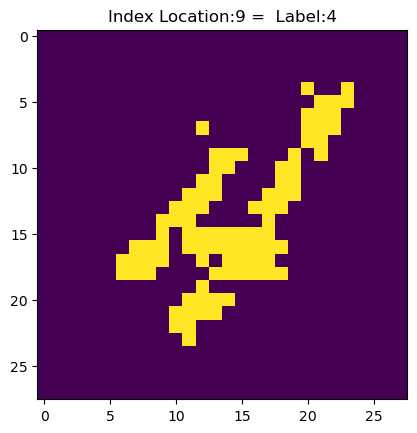

Original image


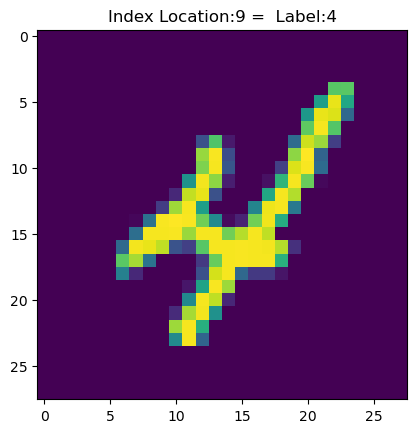

In [63]:
inputX = np.array(X_train)
rbmOne = rbm_list[0]

print('RBM 1')
outputX_rbmOne, reconstructedX_rbmOne, hiddenX_rbmOne = rbmOne.rbm_output(inputX)
reconstructedX_rbmOne = pd.DataFrame(data=reconstructedX_rbmOne, index=X_train.index)

for j in range(0,10):
    example = j
    print("Image generated by RBM")
    view_digit(reconstructedX_rbmOne, y_train, example)
    print("Original image")
    view_digit(X_train, y_train, example)

**CREATE The Full Deep Belief Networks (DBN)**

In [64]:
class DBN(object):
    def __init__(self, original_input_size, input_size, output_size, 
                 learning_rate, epochs, batchsize, rbmOne, rbmTwo, rbmThree):
        # Define hyperparameters
        self._original_input_size = original_input_size
        self._input_size = input_size
        self._output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batchsize = batchsize
        self.rbmOne = rbmOne
        self.rbmTwo = rbmTwo
        self.rbmThree = rbmThree
    
        self.w = np.zeros([input_size, output_size], "float")
        self.hb = np.zeros([output_size], "float")
        self.vb = np.zeros([input_size], "float")
    
    def prob_h_given_v(self, visible, w, hb):
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.compat.v1.random_uniform(tf.shape(probs))))

    def train(self, X):
        _w = tf.compat.v1.placeholder("float", [self._input_size, self._output_size])
        _hb = tf.compat.v1.placeholder("float", [self._output_size])
        _vb = tf.compat.v1.placeholder("float", [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], "float")
        prv_hb = np.zeros([self._output_size], "float")
        prv_vb = np.zeros([self._input_size], "float")
        
        cur_w = np.zeros([self._input_size, self._output_size], "float")
        cur_hb = np.zeros([self._output_size], "float")
        cur_vb = np.zeros([self._input_size], "float")
        
        v0 = tf.compat.v1.placeholder("float", [None, self._original_input_size])

        forwardOne = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(v0, self.rbmOne.w) + self.rbmOne.hb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(v0, self.rbmOne.w) + self.rbmOne.hb)))))
        forwardTwo = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb)))))
        forward = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(forwardTwo, self.rbmThree.w) + self.rbmThree.hb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(forwardTwo, self.rbmThree.w) + self.rbmThree.hb)))))
        h0 = self.sample_prob(self.prob_h_given_v(forward, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        
        positive_grad = tf.matmul(tf.transpose(forward), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        update_w = _w + self.learning_rate * (positive_grad - negative_grad) / tf.cast(tf.shape(forward)[0], tf.float32)
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(forward - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        
        backwardOne = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(v1, self.rbmThree.w.T) + self.rbmThree.vb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(v1, self.rbmThree.w.T) + self.rbmThree.vb)))))
        backwardTwo = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmTwo.w.T) + self.rbmTwo.vb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmTwo.w.T) + self.rbmTwo.vb)))))
        backward = tf.nn.relu(tf.sign(tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmOne.w.T) + self.rbmOne.vb) - tf.compat.v1.random_uniform(tf.shape(tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmOne.w.T) + self.rbmOne.vb)))))
        
        err = tf.reduce_mean(tf.square(v0 - backward))
        error_list = []
        
        with tf.compat.v1.Session() as sess:
            sess.run(tf.compat.v1.global_variables_initializer())

            for epoch in range(self.epochs):
                for start, end in zip(range(0, len(X), self.batchsize), range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print ('Epoch: %d' % epoch,'reconstruction error: %f' % error)
                error_list.append(error)
                
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb
            return error_list
        
    def dbn_output(self, X):

        input_X = tf.constant(X)
        forwardOne = tf.nn.sigmoid(tf.matmul(input_X, self.rbmOne.w) + self.rbmOne.hb)
        forwardTwo = tf.nn.sigmoid(tf.matmul(forwardOne, self.rbmTwo.w) + self.rbmTwo.hb)
        forward = tf.nn.sigmoid(tf.matmul(forwardTwo, self.rbmThree.w) + self.rbmThree.hb)

        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        _vb = tf.constant(self.vb)

        out = tf.nn.sigmoid(tf.matmul(forward, _w) + _hb)
        hiddenGen = self.sample_prob(self.prob_h_given_v(forward, _w, _hb))
        visibleGen = self.sample_prob(self.prob_v_given_h(hiddenGen, _w, _vb))

        backwardTwo = tf.nn.sigmoid(tf.matmul(visibleGen, self.rbmThree.w.T) + self.rbmThree.vb)
        backwardOne = tf.nn.sigmoid(tf.matmul(backwardTwo, self.rbmTwo.w.T) + self.rbmTwo.vb)
        backward = tf.nn.sigmoid(tf.matmul(backwardOne, self.rbmOne.w.T) + self.rbmOne.vb)

        with tf.compat.v1.Session() as sess:
            sess.run(tf.compat.v1.global_variables_initializer())
            return sess.run(out), sess.run(backward)

    def show_features(self, shape, suptitle, count=-1):
        maxw = np.amax(self.w.T)
        minw = np.amin(self.w.T)
        count = self._output_size if count == -1 or count > self._output_size else count
        ncols = count if count < 14 else 14 
        nrows = count//ncols
        nrows = nrows if nrows > 2 else 3
        fig = plt.figure(figsize=(ncols, nrows), dpi=100)
        grid = Grid(fig, rect=111, nrows_ncols=(nrows, ncols), axes_pad=0.01)

        for i, ax in enumerate(grid):
            x = self.w.T[i] if i<self._input_size else np.zeros(shape)
            x = (x.reshape(1, -1) - minw)/maxw
            ax.imshow(x.reshape(*shape), cmap=mpl.cm.Greys)
            ax.set_axis_off()

        fig.text(0.5,1, suptitle, fontsize=20, horizontalalignment='center')
        fig.tight_layout()
        plt.show()
        return

**TRAIN THE DBN**

In [65]:
# Instantiate DBN Class
dbn = DBN(784, 500, 500, 1.0, 50, 200, rbm_list[0], rbm_list[1], rbm_list[2])

In [66]:
# Train
inputX = np.array(X_train)
error_list = []
error_list = dbn.train(inputX)

Epoch: 0 reconstruction error: 0.089090
Epoch: 1 reconstruction error: 0.080490
Epoch: 2 reconstruction error: 0.076748
Epoch: 3 reconstruction error: 0.074865
Epoch: 4 reconstruction error: 0.073313
Epoch: 5 reconstruction error: 0.071883
Epoch: 6 reconstruction error: 0.071405
Epoch: 7 reconstruction error: 0.070532
Epoch: 8 reconstruction error: 0.069885
Epoch: 9 reconstruction error: 0.069366
Epoch: 10 reconstruction error: 0.068969
Epoch: 11 reconstruction error: 0.068743
Epoch: 12 reconstruction error: 0.068139
Epoch: 13 reconstruction error: 0.067666
Epoch: 14 reconstruction error: 0.067494
Epoch: 15 reconstruction error: 0.067193
Epoch: 16 reconstruction error: 0.066886
Epoch: 17 reconstruction error: 0.066494
Epoch: 18 reconstruction error: 0.066233
Epoch: 19 reconstruction error: 0.066206
Epoch: 20 reconstruction error: 0.065788
Epoch: 21 reconstruction error: 0.065757
Epoch: 22 reconstruction error: 0.065317
Epoch: 23 reconstruction error: 0.065191
Epoch: 24 reconstruction e

DBN


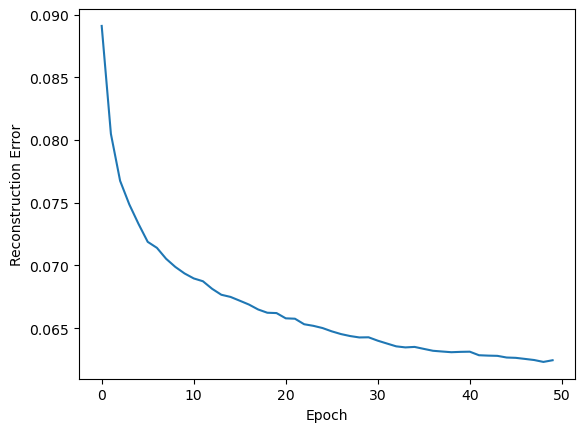

In [67]:
# Plot reconstruction errors
print("DBN")
pd.Series(error_list).plot(logy=False)
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")
plt.show()

In [69]:
print(dbn.show_features((25,20),"DBN learned features from MNIST", 56))

NameError: name 'Grid' is not defined

<Figure size 1400x400 with 0 Axes>

**Generate Images to Build a Better Image Classifier**

In [68]:
# Generate images and store them
inputXReduced = X_train.loc[:4999]
for i in range(0,20):
    print("Run ",i)
    finalOutput_DBN, reconstructedOutput_DBN = dbn.dbn_output(inputXReduced)
    if i==0:
        generatedImages = finalOutput_DBN
    else:
        generatedImages = np.append(generatedImages, finalOutput_DBN, axis=0)

Run  0
Run  1
Run  2
Run  3
Run  4
Run  5
Run  6
Run  7
Run  8
Run  9
Run  10
Run  11
Run  12
Run  13
Run  14
Run  15
Run  16
Run  17
Run  18
Run  19


In [70]:
# Generate a vector of labels for the generated images
for i in range(0,20):
    if i==0:
        labels = y_train.loc[:4999]
    else:
        labels = np.append(labels,y_train.loc[:4999])

In [71]:
# Generate images based on the validation set
inputValidation = np.array(X_validation)
finalOutput_DBN_validation, reconstructedOutput_DBN_validation = dbn.dbn_output(inputValidation)

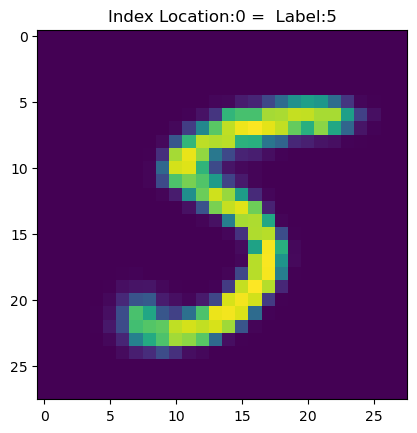

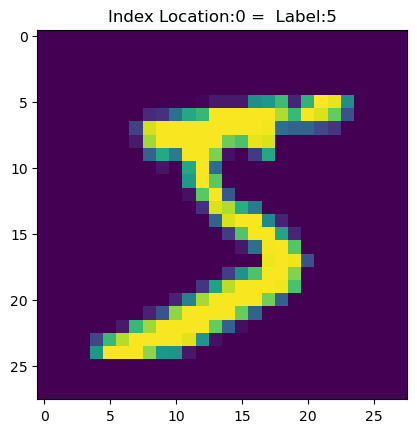

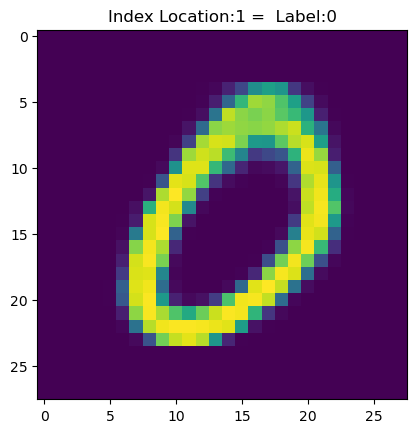

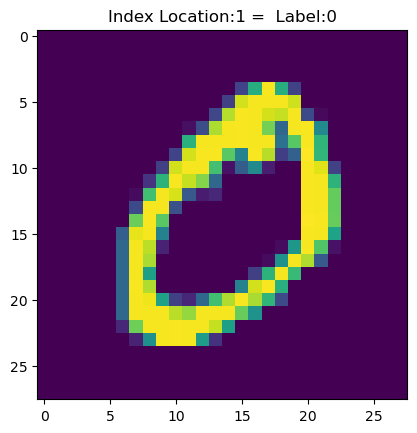

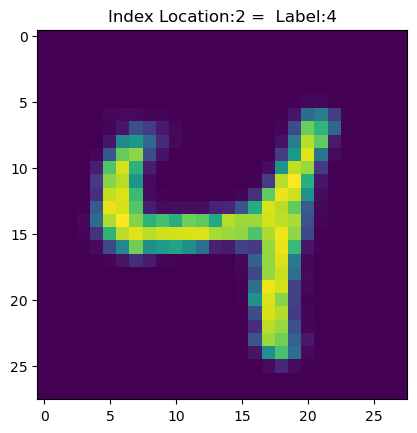

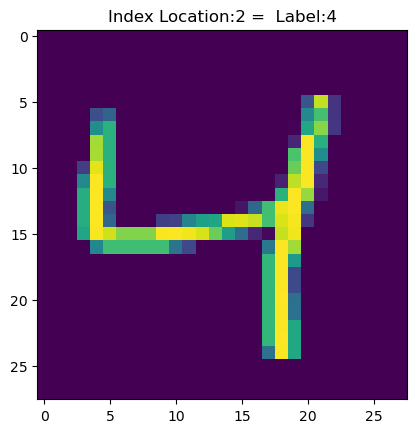

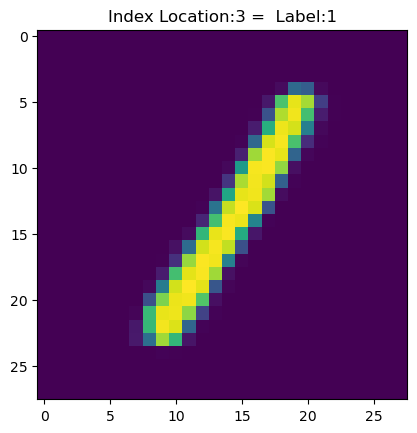

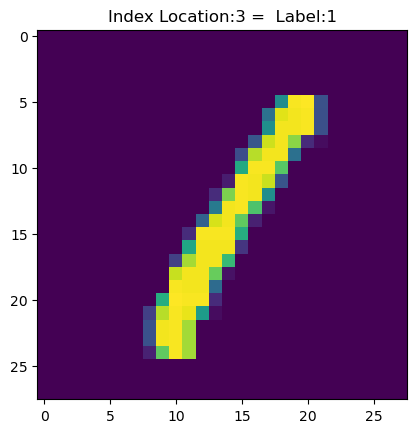

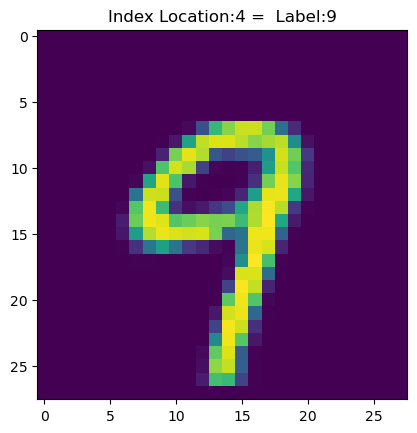

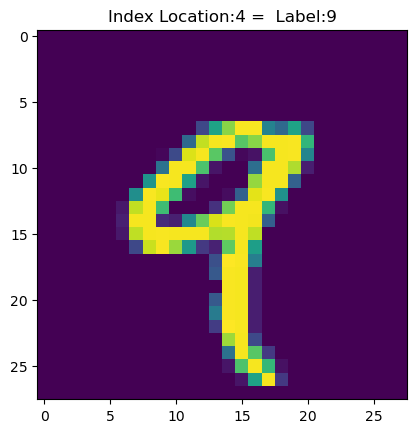

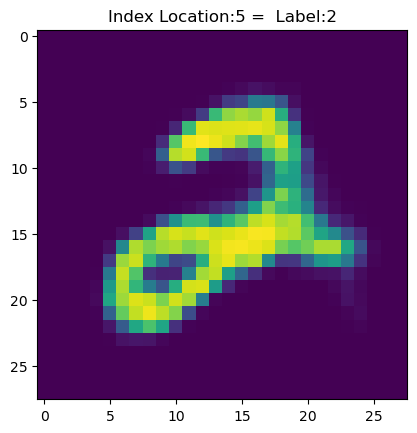

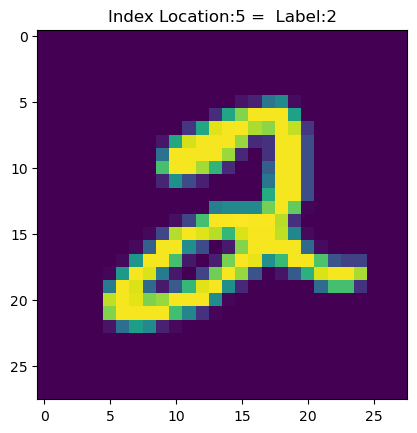

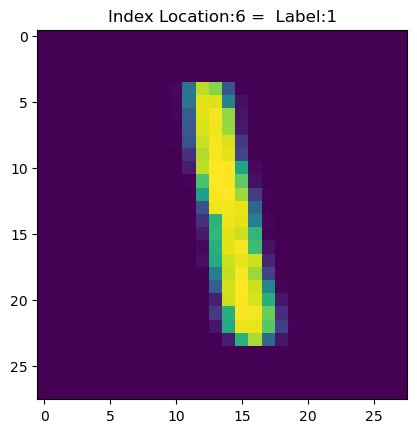

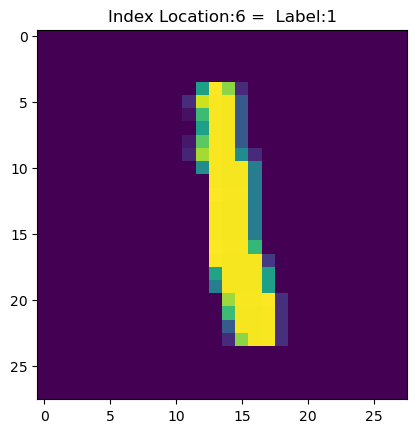

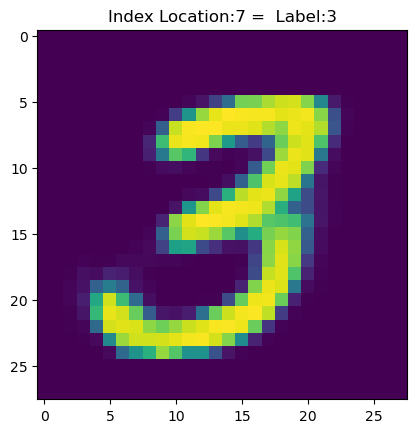

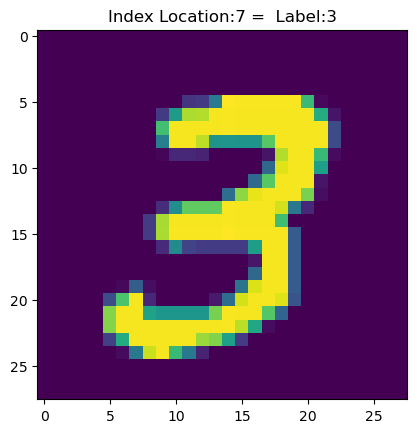

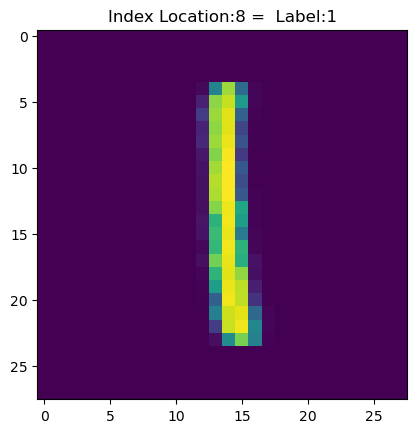

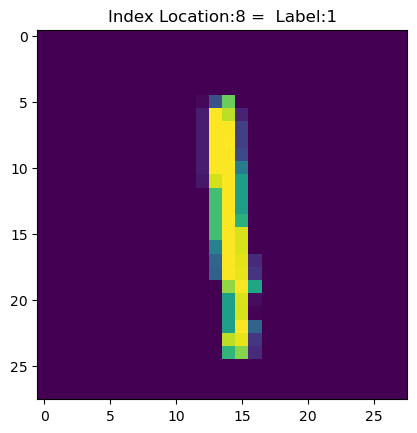

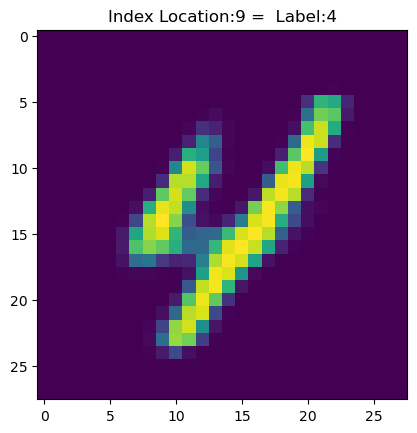

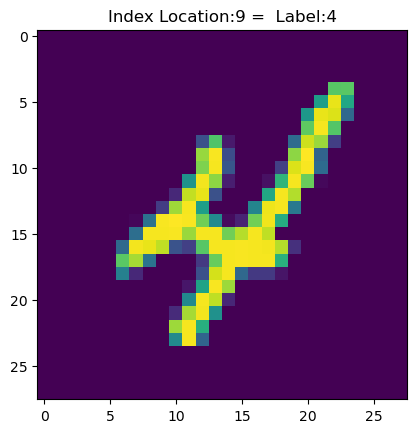

In [73]:
# View first few reconstructed images
for i in range(0,10):
    example = i
    reconstructedX = pd.DataFrame(data=reconstructedOutput_DBN, index=X_train[0:5000].index)
    view_digit(reconstructedX, y_train, example)
    view_digit(X_train, y_train, example)

Run  0
Generated


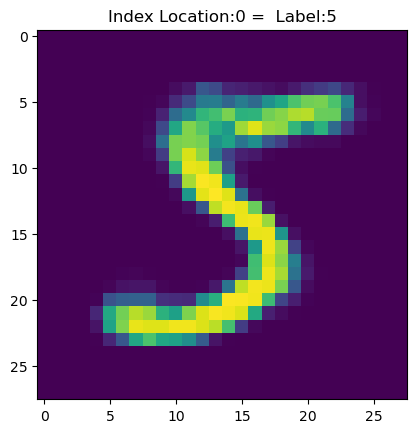

Run  1
Generated


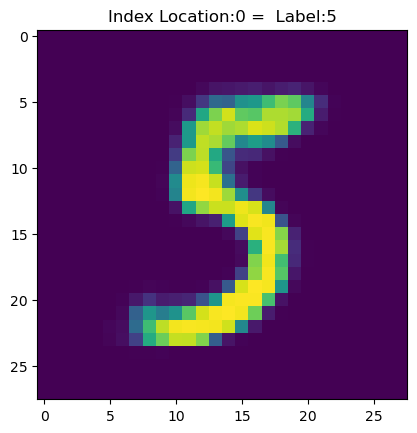

Run  2
Generated


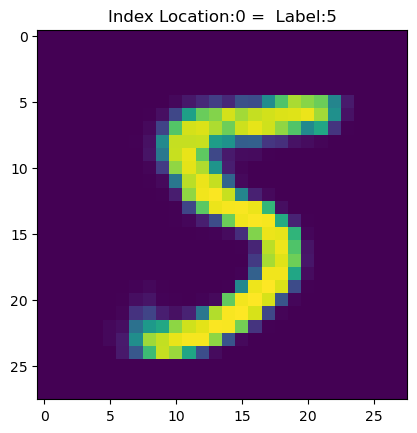

Run  3
Generated


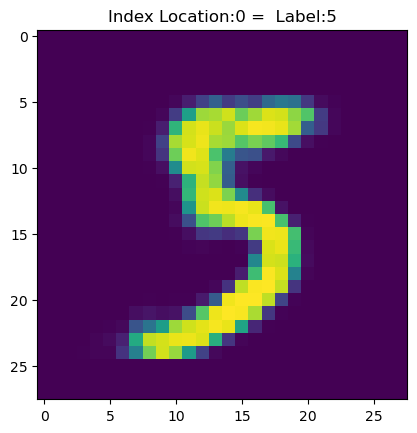

Run  4
Generated


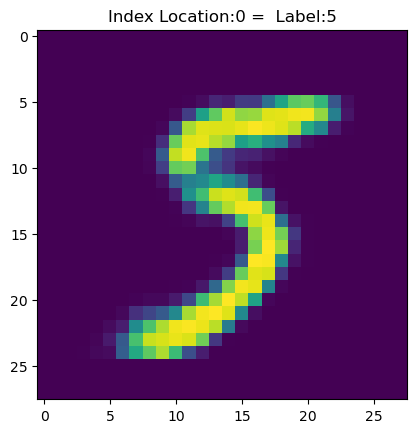

Run  5
Generated


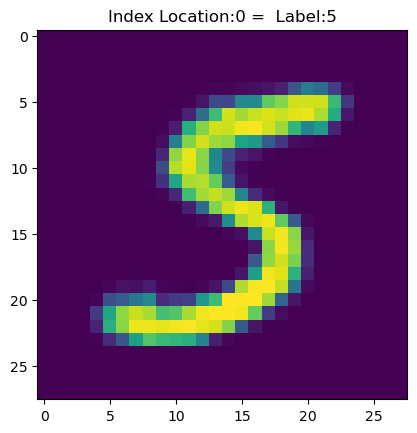

Run  6
Generated


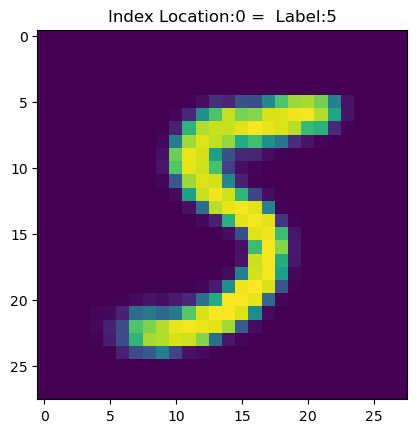

Run  7
Generated


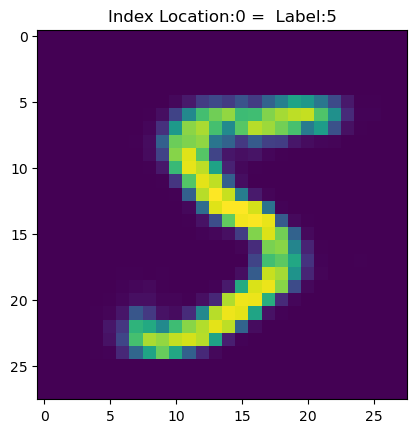

Run  8
Generated


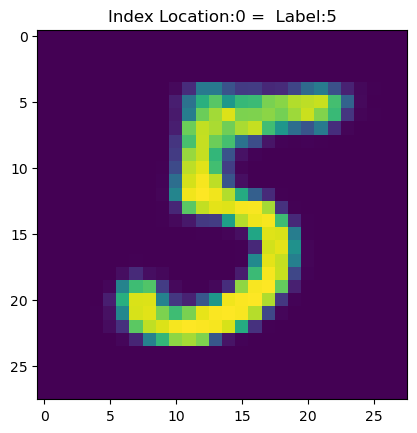

Run  9
Generated


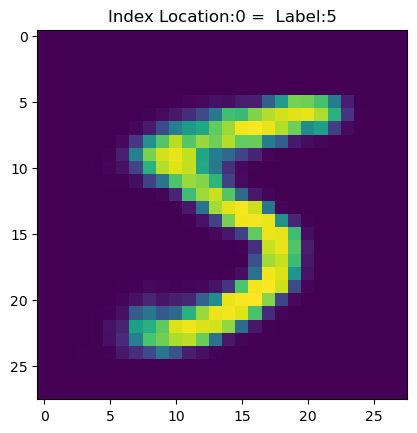

In [74]:
# Generate the several versions of the first digit
inputXReduced = X_train.loc[:0]
for i in range(0,10):
    example = 0
    
    print("Run ",i)
    finalOutput_DBN_fives, reconstructedOutput_DBN_fives = dbn.dbn_output(inputXReduced)
    reconstructedX_fives = pd.DataFrame(data=reconstructedOutput_DBN_fives, index=[0])
    
    print("Generated")
    view_digit(reconstructedX_fives, y_train.loc[:0], example)

**Image Classifier Using LightGBM**

**Supervised Only**

In [75]:
# Set Parameters
predictionColumns = ['0','1','2','3','4','5','6','7','8','9']

params_lightGB = {
    'task': 'train',
    'num_class':10,
    'boosting': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [78]:
# Train
trainingScore = []
validationScore = []
predictionsLightGBM = pd.DataFrame(data=[], index=y_validation.index, columns=predictionColumns)

lgb_train = lgb.Dataset(X_train.loc[:4999], y_train.loc[:4999])
lgb_eval = lgb.Dataset(X_validation, y_validation, reference=lgb_train)
gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=200)
    
loglossTraining = log_loss(y_train.loc[:4999], gbm.predict(X_train.loc[:4999], num_iteration=gbm.best_iteration))
trainingScore.append(loglossTraining)
    
predictionsLightGBM.loc[X_validation.index,predictionColumns] = gbm.predict(X_validation, num_iteration=gbm.best_iteration) 
loglossValidation = log_loss(y_validation, predictionsLightGBM.loc[X_validation.index,predictionColumns])
validationScore.append(loglossValidation)
    
print('Training Log Loss: ', loglossTraining)
print('Validation Log Loss: ', loglossValidation)

loglossLightGBM = log_loss(y_validation, predictionsLightGBM)
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBM)

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [79]:
# Supervised-only Accuracy
predictionsLightGBM_firm = np.argmax(np.array(predictionsLightGBM), axis=1)
accuracyValidation_lightGBM = accuracy_score(np.array(y_validation), predictionsLightGBM_firm)
print("Supervised-Only Accuracy: ", accuracyValidation_lightGBM)

Supervised-Only Accuracy:  0.0991


**Unsupervised and Supervised Solution**

In [81]:
# Prepare DBN-based DataFrames for LightGBM use
generatedImagesDF = pd.DataFrame(data=generatedImages,index=range(0,100000))
labelsDF = pd.DataFrame(data=labels,index=range(0,100000))

X_train_lgb = pd.DataFrame(data=generatedImagesDF,
                           index=generatedImagesDF.index)

X_validation_lgb = pd.DataFrame(data=finalOutput_DBN_validation,
                                index=X_validation.index)

In [82]:
# Train LightGBM
trainingScore = []
validationScore = []

predictionsDBN = pd.DataFrame(data=[],index=y_validation.index, columns=predictionColumns)

lgb_train = lgb.Dataset(X_train_lgb, labels)
lgb_eval = lgb.Dataset(X_validation_lgb, y_validation, reference=lgb_train)
gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
loglossTraining = log_loss(labelsDF, gbm.predict(X_train_lgb, num_iteration=gbm.best_iteration))
trainingScore.append(loglossTraining)
    
predictionsDBN.loc[X_validation.index,predictionColumns] = gbm.predict(X_validation_lgb, num_iteration=gbm.best_iteration) 
loglossValidation = log_loss(y_validation, predictionsDBN.loc[X_validation.index,predictionColumns])
validationScore.append(loglossValidation)
    
print('Training Log Loss: ', loglossTraining)
print('Validation Log Loss: ', loglossValidation)

loglossDBN = log_loss(y_validation, predictionsDBN)
print('LightGBM Gradient Boosting Log Loss: ', loglossDBN)

TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# DBN-Based Solution Accuracy
predictionsDBN_firm = np.argmax(np.array(predictionsDBN), axis=1)
accuracyValidation_DBN = accuracy_score(np.array(y_validation), predictionsDBN_firm)
print("DBN-Based Solution Accuracy: ", accuracyValidation_DBN)

In [ ]:
import datetime as dt
print("Completed: ", dt.datetime.now())